In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv(r"C:\Users\Hrutika\Desktop\Software Project\student-mat.csv")

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


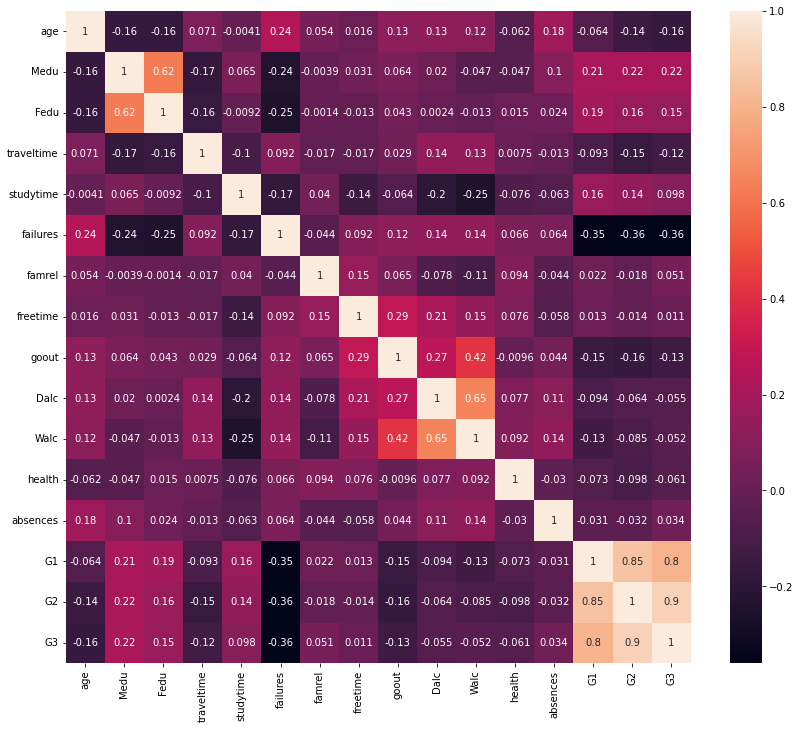

In [4]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [5]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
nonnumeric_columns=[data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype=='object']
nonnumeric_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [7]:
for column in nonnumeric_columns:
    print(f'{column}: {data[column].unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [8]:
data['Mjob']= data['Mjob'].apply(lambda x:'m_' + x)
data['Fjob']= data['Fjob'].apply(lambda x:'f_' + x)
data['reason']= data['reason'].apply(lambda x:'r_' + x)
data['guardian']= data['guardian'].apply(lambda x:'g_' + x)

In [9]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,m_at_home,f_teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,m_at_home,f_other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,m_health,f_services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,m_other,f_other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,m_services,f_services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,m_services,f_services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,m_other,f_other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,m_services,f_other,...,4,4,1,3,4,5,0,11,12,10


In [10]:
dummies = pd.concat([pd.get_dummies(data['Mjob']),pd.get_dummies(data['Fjob']),pd.get_dummies(data['reason']),pd.get_dummies(data['guardian'])],axis=1)

In [11]:
dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [12]:
data = pd.concat([data,dummies], axis=1)
data.drop(['Mjob','Fjob','reason','guardian'], axis=1, inplace=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [13]:
nonnumeric_columns=[data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype=='object']
for column in nonnumeric_columns:
    print(f'{column}: {data[column].unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [14]:
encoder = LabelEncoder()
for column in nonnumeric_columns:
    data[column] = encoder.fit_transform(data[column])
    

In [15]:
data.dtypes

school          int32
sex             int32
age             int64
address         int32
famsize         int32
Pstatus         int32
Medu            int64
Fedu            int64
traveltime      int64
studytime       int64
failures        int64
schoolsup       int32
famsup          int32
paid            int32
activities      int32
nursery         int32
higher          int32
internet        int32
romantic        int32
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
m_at_home       uint8
m_health        uint8
m_other         uint8
m_services      uint8
m_teacher       uint8
f_at_home       uint8
f_health        uint8
f_other         uint8
f_services      uint8
f_teacher       uint8
r_course        uint8
r_home          uint8
r_other         uint8
r_reputation    uint8
g_father        uint8
g_mother        uint8
g_other   

In [16]:
y=data['G3']
x=data.drop('G3',axis=1)
#x=data.drop('g_other',axis=1)
#x=data.drop('g_mother',axis=1)
#x=data.drop('g_father',axis=1)
#x=data.drop(['g_other', 'g_mother'], axis=1)

In [17]:
x=x[['G2']]


In [18]:
x

,G2
0,6
1,5
2,8
3,14
4,10
...,...
390,9
391,16
392,8
393,12


In [19]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [20]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [21]:
x

,G2
0,6
1,5
2,8
3,14
4,10
...,...
390,9
391,16
392,8
393,12


In [22]:
#scalar = StandardScaler()
#x = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)

In [23]:
x

,G2
0,6
1,5
2,8
3,14
4,10
...,...
390,9
391,16
392,8
393,12


In [80]:
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.55,random_state=0)

In [81]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [82]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)
Y_Pred=classifier.predict(X_test)

In [83]:
Y_Pred

array([14, 11, 10, 15, 15, 12, 13, 11, 10, 15,  8, 12, 11,  8, 15, 14, 13,
       10, 10, 15,  8,  0,  8, 15, 12, 15, 10, 18,  0, 13,  0,  8,  8,  0,
       13, 10, 13, 18, 10, 12,  0, 18,  8, 10, 10,  0, 12,  0, 12,  8, 10,
       18, 11,  8, 12,  8, 10, 13, 15, 14, 13, 13, 14, 15, 10, 15, 18, 12,
        0, 10, 10, 14,  8,  0, 10, 10, 11, 18,  8, 10, 10,  8, 10, 13, 10,
       11, 11, 15, 18,  8, 10,  0, 10, 15,  8, 10, 18, 11, 12, 10, 10, 13,
        8,  8,  0, 13, 15,  0,  8,  8,  8, 10, 15,  0,  0,  8, 10,  0, 10,
       15, 11, 13, 13,  0, 11, 15, 13, 15, 10, 13, 15, 10, 12, 14, 10,  8,
       10, 11, 10, 13,  0, 10,  8,  8, 13, 12, 15, 13, 13, 11,  0, 14, 10,
       12, 12,  0, 11, 10,  0, 14, 13, 10, 10, 10,  8, 15,  0,  0, 10, 13,
       12,  8,  0, 10, 12,  0, 14, 18], dtype=int64)

In [84]:
from sklearn import metrics
print('Accuracy Score: with linear kernel')
print(metrics.accuracy_score(y_test,Y_Pred))

Accuracy Score: with linear kernel
0.449438202247191


In [88]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)
#Y_Pred=classifier.predict(X_test)
Y_Pred=classifier.predict(X_test)
print('Accuracy Score : with default rbf kernel')
print(metrics.accuracy_score(y_test,Y_Pred))

Accuracy Score : with default rbf kernel
0.4550561797752809


In [126]:
classifier = SVC(kernel='rbf',gamma=1,C=7,random_state=0)
classifier.fit(X_train,y_train)
Y_Pred=classifier.predict(X_test)
print('Accuracy Score : with default rbf kernel')
print(metrics.accuracy_score(y_test,Y_Pred))

Accuracy Score : with default rbf kernel
0.48314606741573035
